<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<!-- Load Google Font (Example: 'Pacifico') -->
<link href="https://fonts.googleapis.com/css2?family=Pacifico&display=swap" rel="stylesheet">

<a id="import"></a>
<p style="background: linear-gradient(45deg, pink, pink); /* Gradient background */
           font-family: 'Pacifico', cursive;  /* Custom font from Google Fonts */
           color: blue; 
           font-size: 350%; /* Increased font size for more emphasis */
           text-align: center; 
           border-radius: 30px 60px; /* Adjusted border radius for a unique shape */
           padding: 25px;
           text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.5);  /* More pronounced 3D text shadow */
           letter-spacing: 3px;  /* Extra spacing for a premium look */
           box-shadow: 0 4px 15px rgba(0, 0, 0, 0.3); /* Adds a shadow around the entire box */
           border: 2px solid white; /* White border around the text block */
           transition: transform 0.3s ease;"> <!-- Adds a hover transition effect -->
    Breast Cancer Detection
</p>

<!-- Add a hover effect for interaction -->
<style>
p:hover {
    transform: scale(1.05); /* Slight zoom-in effect on hover */
}
</style>


<div style="border: 2px solid #ccc; border-radius: 10px; padding: 20px; background-color: black;">
    <h2 style="color: #fff;">What is Breast Cancer ? </h2>
    <p style="color: #fff;">Breast cancer is a type of cancer that forms in the cells of the breasts. It occurs when abnormal cells in the breast grow and multiply uncontrollably. Breast cancer can spread to other parts of the body if not detected and treated early. It is one of the most common cancers among women, though it can also affect men.</p>
</div>

<div style="border: 2px solid #ccc; border-radius: 10px; padding: 20px; background-color: black; margin-bottom: 20px;">
    <h2 style="color: #fff;">What are the types of Breast Tumors?</h2>
    <h3 style="color: #FF6347;">Malignant Tumor</h3>
   <p style="color: #fff;">A <b>malignant tumor</b> is cancerous. It means that the tumor's cells can invade nearby tissues and spread to other parts of the body (metastasize). Malignant tumors are typically more serious and require prompt treatment.</p>
    <h3 style="color: #FF6347;">Benign Tumor</h3>
    <p style="color: #fff;">A <b>benign tumor</b> is non-cancerous. It means that the tumor does not spread to other parts of the body and usually does not grow back after removal. While benign tumors are less serious than malignant ones, they may still require treatment if they grow large or cause other problems.</p>
</div>

<a id="import"></a>
# <p style="background-color:#FF9999; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 1 | Import Libraries</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
os.chdir('C:\\Users\\dell\\downloads')

In [4]:
import os
os.getcwd()

'C:\\Users\\dell\\downloads'

<a id="import"></a>
# <p style="background-color:#FF9999; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 2 | Read Dataset</p>

In [5]:
df = pd.read_csv('Breast_cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,Malignant,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,Malignant,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,Malignant,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
df.shape

(569, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
# descriptive statistics of data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<a id="import"></a>
# <p style="background-color:#FF9999; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 3 | Exploratory Data Analysis</p>

<Axes: xlabel='diagnosis', ylabel='count'>

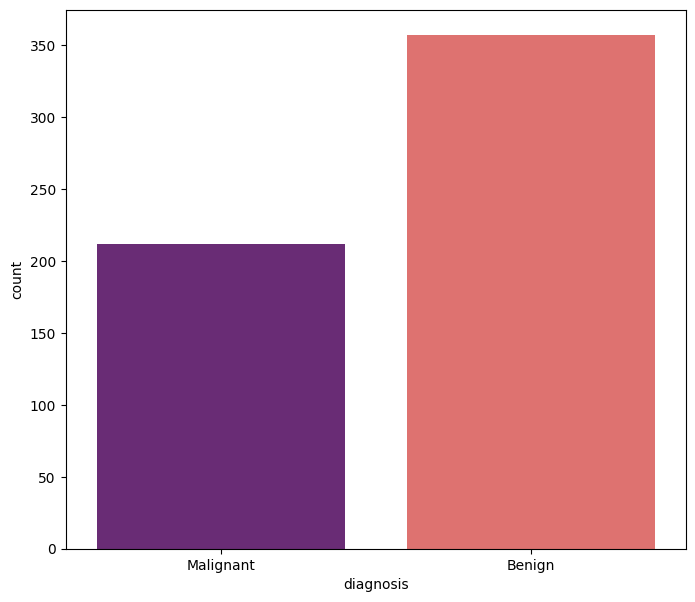

In [11]:
# countplot
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df, palette='magma')

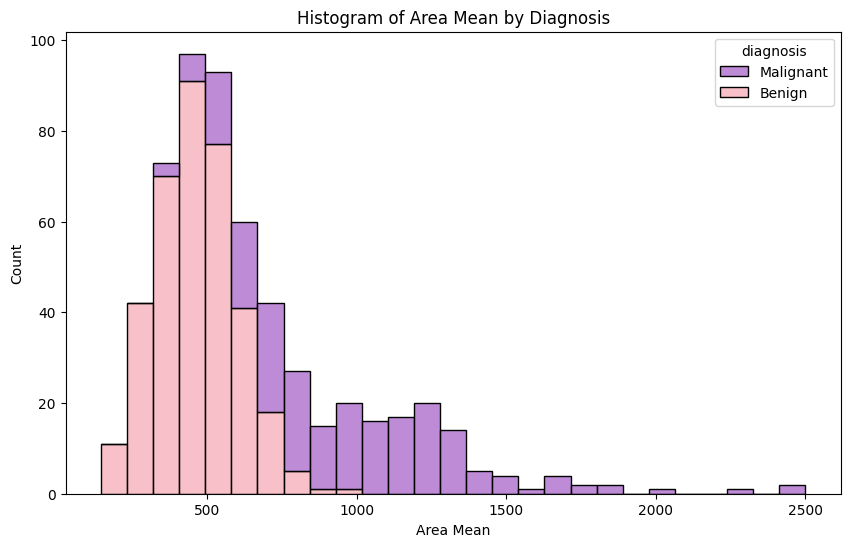

In [12]:
plt.figure(figsize=(10,6))

# Adjusting to use the correct column name (if 'area_mean' exists)
sns.histplot(data=df, x='area_mean', hue='diagnosis', palette=['#A865C9', '#f6abb6'], multiple="stack")

plt.title('Histogram of Area Mean by Diagnosis')
plt.xlabel('Area Mean')
plt.ylabel('Count')
plt.show()

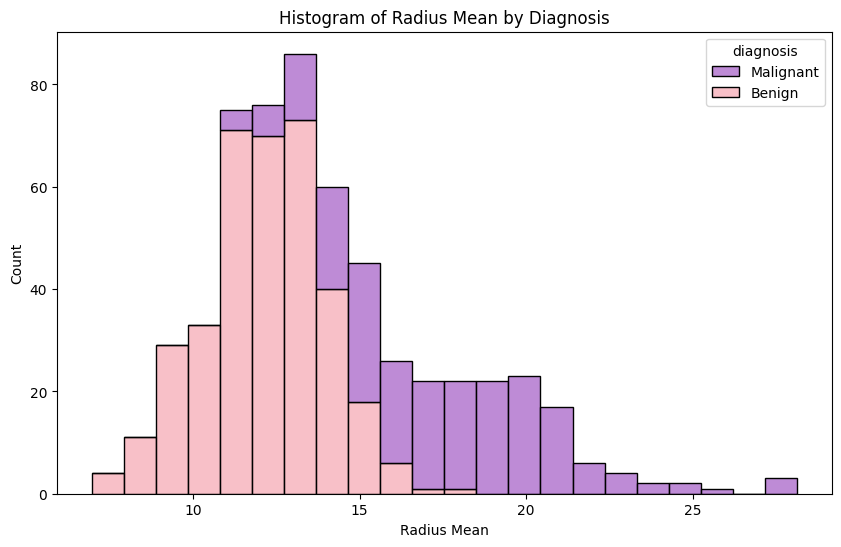

In [13]:
plt.figure(figsize=(10,6))

# Adjusting to use the correct column name (if 'area_mean' exists)
sns.histplot(data=df, x='radius_mean', hue='diagnosis', palette=['#A865C9', '#f6abb6'], multiple="stack")

plt.title('Histogram of Radius Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Count')
plt.show()

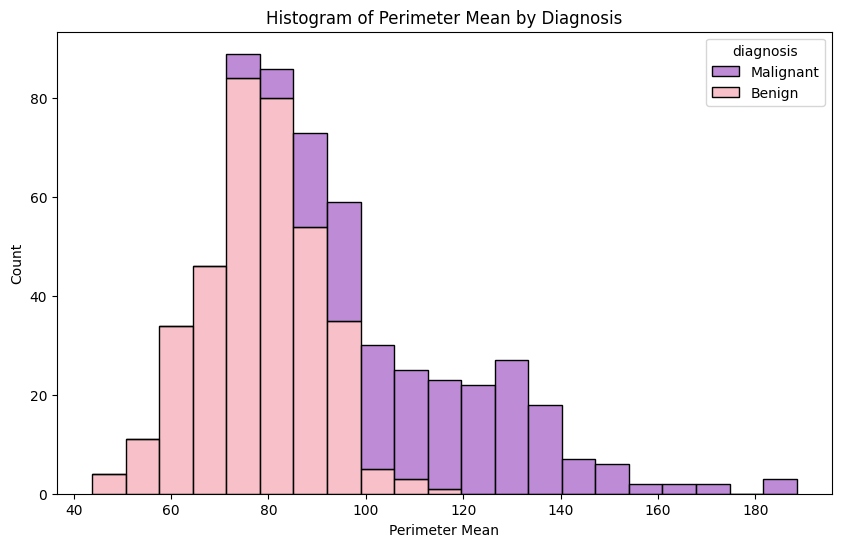

In [14]:
plt.figure(figsize=(10,6))

# Adjusting to use the correct column name (if 'area_mean' exists)
sns.histplot(data=df, x='perimeter_mean', hue='diagnosis', palette=['#A865C9', '#f6abb6'], multiple="stack")

plt.title('Histogram of Perimeter Mean by Diagnosis')
plt.xlabel('Perimeter Mean')
plt.ylabel('Count')
plt.show()

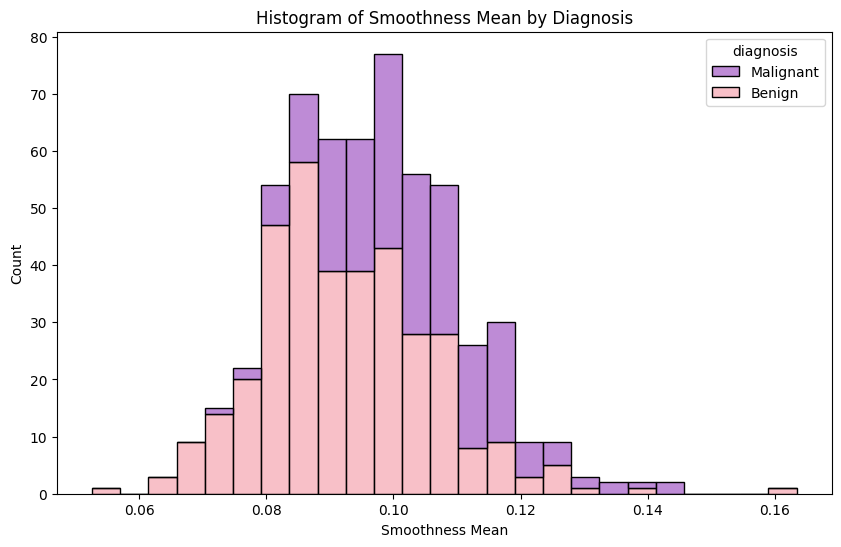

In [15]:
plt.figure(figsize=(10,6))

# Adjusting to use the correct column name (if 'area_mean' exists)
sns.histplot(data=df, x='smoothness_mean', hue='diagnosis', palette=['#A865C9', '#f6abb6'], multiple="stack")

plt.title('Histogram of Smoothness Mean by Diagnosis')
plt.xlabel('Smoothness Mean')
plt.ylabel('Count')
plt.show()

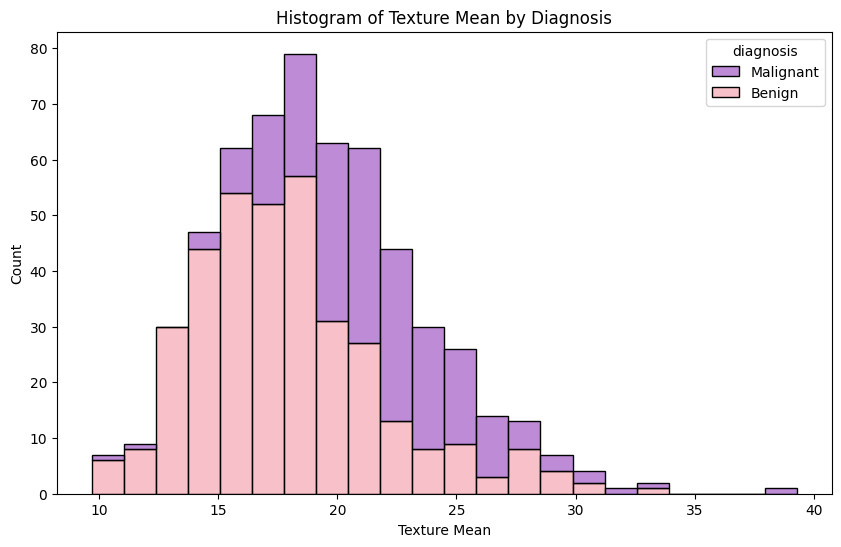

In [16]:
plt.figure(figsize=(10,6))

# Adjusting to use the correct column name (if 'area_mean' exists)
sns.histplot(data=df, x='texture_mean', hue='diagnosis', palette=['#A865C9', '#f6abb6'], multiple="stack")

plt.title('Histogram of Texture Mean by Diagnosis')
plt.xlabel('Texture Mean')
plt.ylabel('Count')
plt.show()

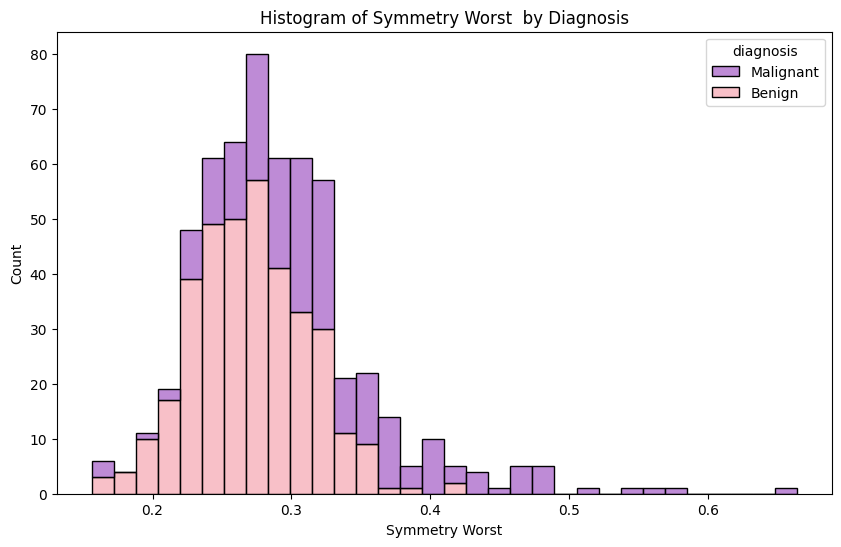

In [17]:
plt.figure(figsize=(10,6))

# Adjusting to use the correct column name (if 'area_mean' exists)
sns.histplot(data=df, x='symmetry_worst', hue='diagnosis', palette=['#A865C9', '#f6abb6'], multiple="stack")

plt.title('Histogram of Symmetry Worst  by Diagnosis')
plt.xlabel('Symmetry Worst')
plt.ylabel('Count')
plt.show()

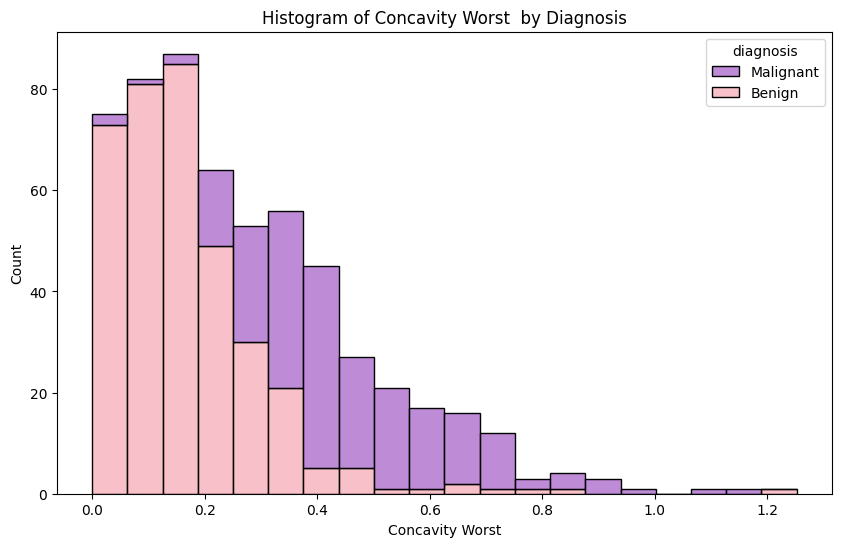

In [18]:
plt.figure(figsize=(10,6))

# Adjusting to use the correct column name (if 'area_mean' exists)
sns.histplot(data=df, x='concavity_worst', hue='diagnosis', palette=['#A865C9', '#f6abb6'], multiple="stack")

plt.title('Histogram of Concavity Worst  by Diagnosis')
plt.xlabel('Concavity Worst')
plt.ylabel('Count')
plt.show()

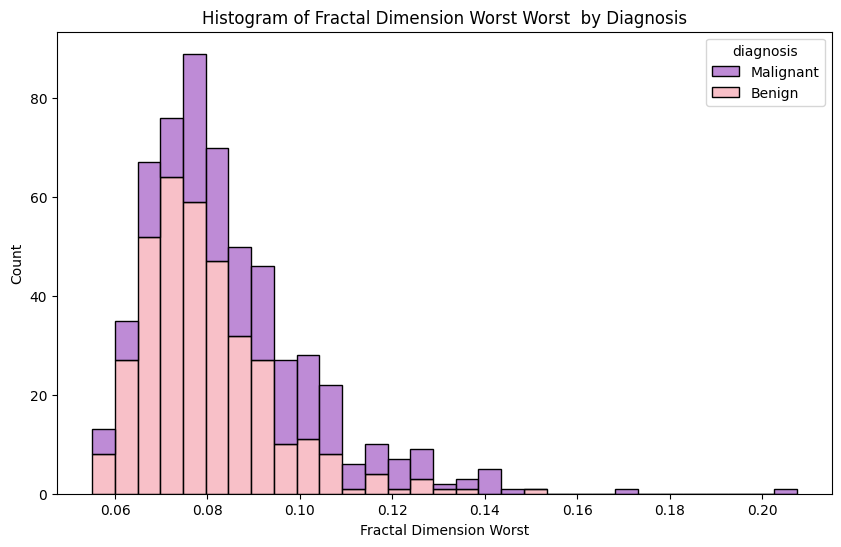

In [19]:
plt.figure(figsize=(10,6))

# Adjusting to use the correct column name (if 'area_mean' exists)
sns.histplot(data=df, x='fractal_dimension_worst', hue='diagnosis', palette=['#A865C9', '#f6abb6'], multiple="stack")

plt.title('Histogram of Fractal Dimension Worst Worst  by Diagnosis')
plt.xlabel('Fractal Dimension Worst')
plt.ylabel('Count')
plt.show()

<a id="import"></a>
# <p style="background-color:#FF9999; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 4 | Data Preprocessing</p>

In [20]:
# dropping id column
df.drop('id',axis=1, inplace=True)

In [21]:
df['diagnosis'].replace('Malignant',0, inplace=True)
df['diagnosis'].replace('Benign',1, inplace=True)

<Axes: >

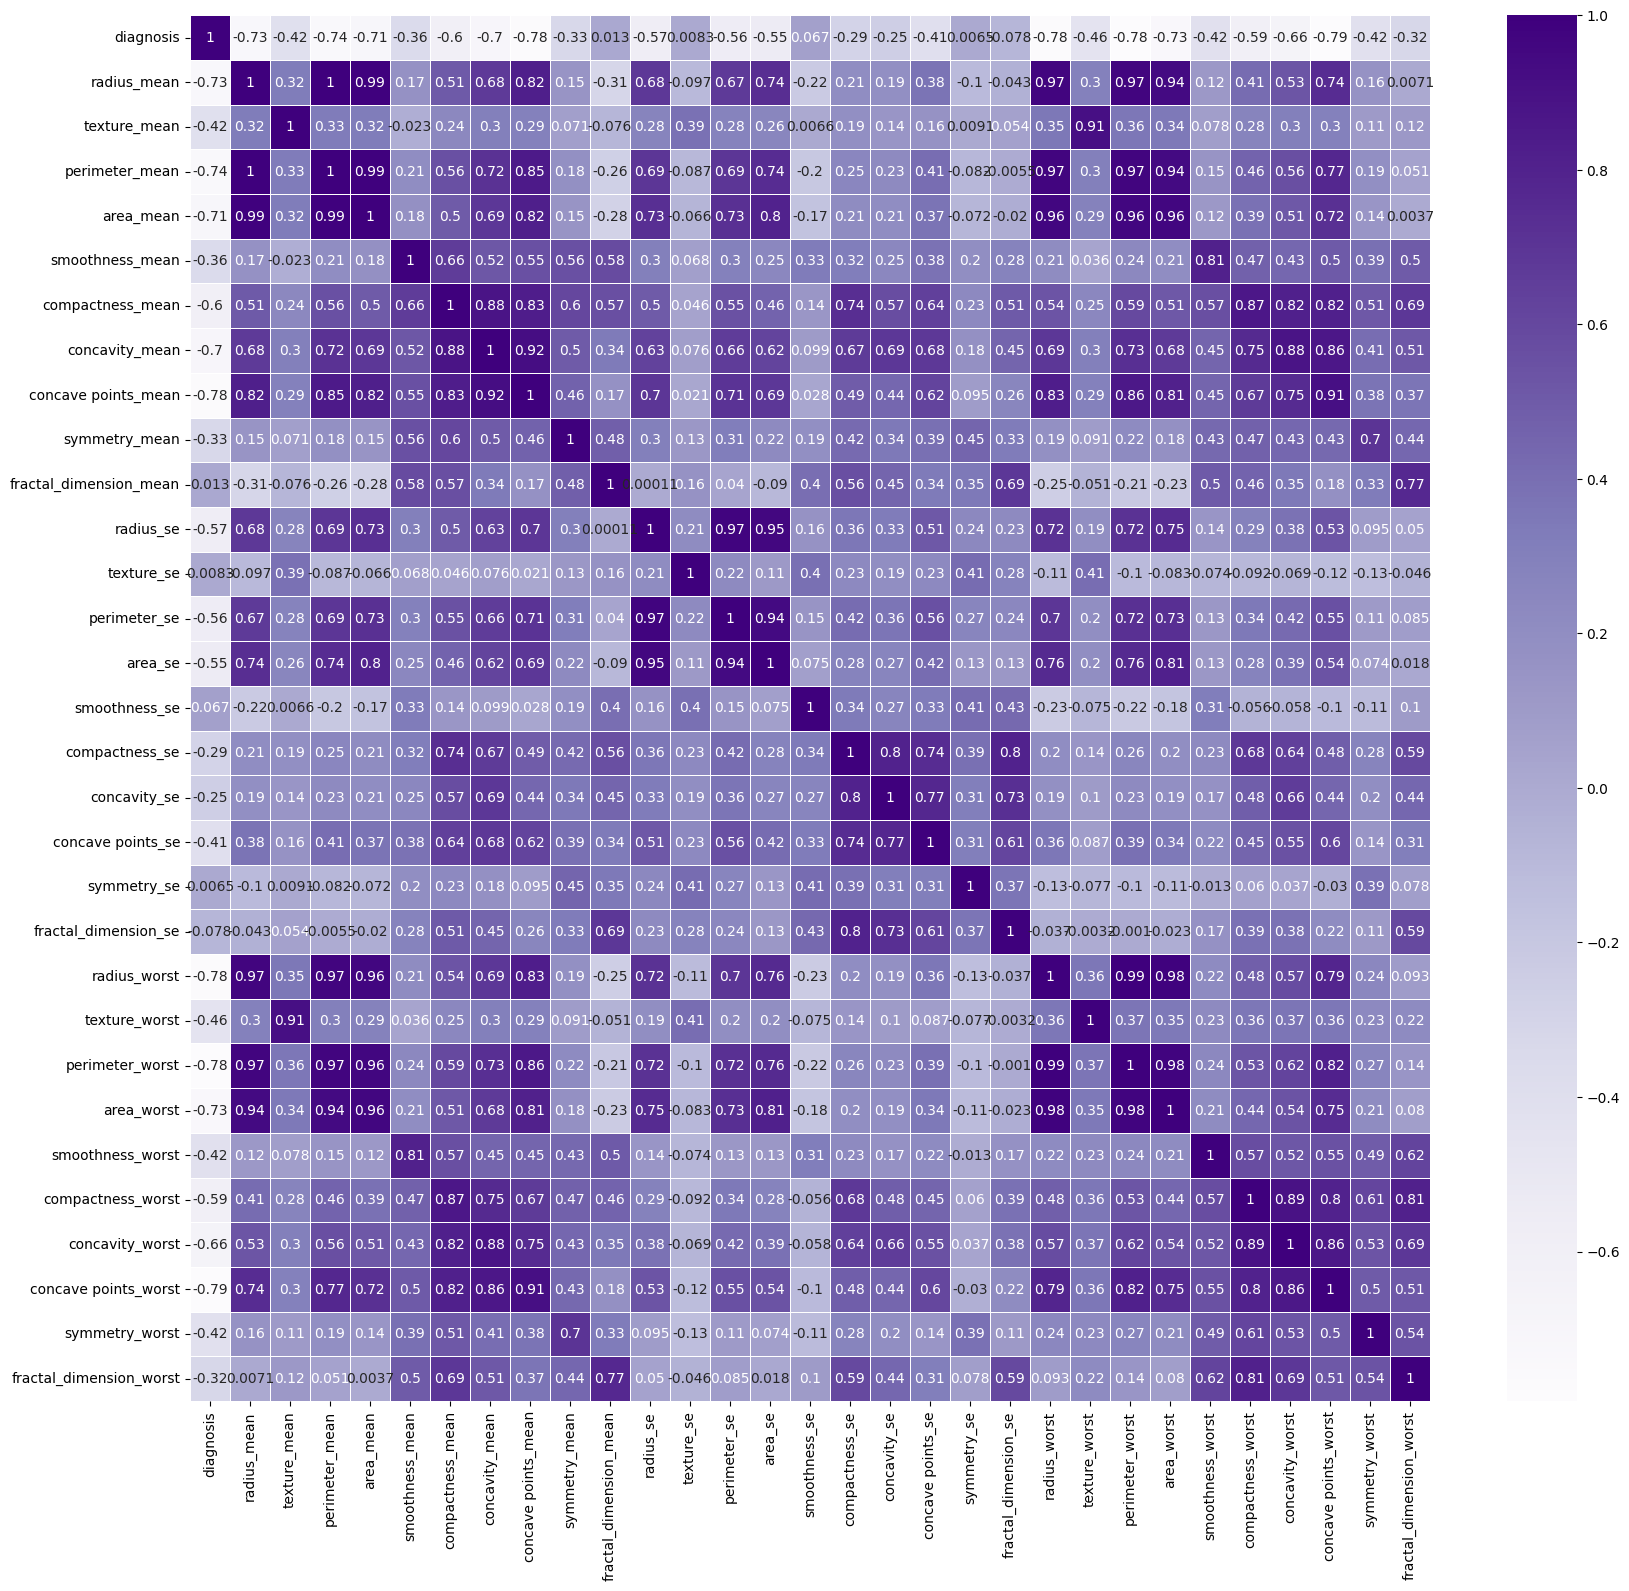

In [22]:
# heatmap
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True,linewidths=.5, cmap="Purples")

In [23]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
X = df.drop(columns='diagnosis', axis=1)
y = df['diagnosis']

In [25]:
X.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [27]:
# split the data into training and testing sets using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (398, 30) (171, 30)


<a id="import"></a>
# <p style="background-color:#FF9999; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 5 | Model Buildings</p>

<a id="import"></a>
# <p style="background-color:#E9967A; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 5.1 | LogisticRegression </p>

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
X_test_prediction = model.predict(X_test)
acc_1 = accuracy_score(X_test_prediction, y_test)
print('Accuracy score on Test Data : ', acc_1)

Accuracy score on Test Data :  0.9181286549707602


In [31]:
conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[59  8]
 [ 6 98]]


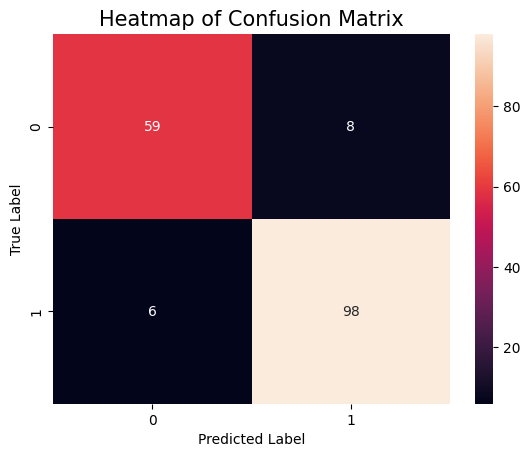

In [32]:
cm = confusion_matrix(y_test, X_test_prediction)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [33]:
class_report = classification_report(y_test, X_test_prediction)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        67
           1       0.92      0.94      0.93       104

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



<a id="import"></a>
# <p style="background-color:#E9967A; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 5.2 | DecisionTreeClassifier </p>

In [34]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
X_test_prediction1 = model1.predict(X_test)
acc_2 = accuracy_score(y_test, X_test_prediction1)
print('Accuracy score on Test Data (Before Tuning): ', acc_2)

Accuracy score on Test Data (Before Tuning):  0.9239766081871345


## Hyper tunning

In [36]:
# Step 3: Hyperparameter tuning using Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Best parameters from Grid Search
print("Best parameters from Grid Search: ", grid_search.best_params_)

Best parameters from Grid Search:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [37]:
best_model = grid_search.best_estimator_
X_test_prediction1_tuned = best_model.predict(X_test)

## After hyper tunning

In [38]:
# Step 5: Evaluate the tuned model
acc_2_tuned = accuracy_score(y_test, X_test_prediction1_tuned)
print('Accuracy score on Test Data (After Tuning): ', acc_2_tuned)

Accuracy score on Test Data (After Tuning):  0.9239766081871345


In [39]:
# Confusion Matrix (After Tuning)
conf_matrix_tuned = confusion_matrix(y_test, X_test_prediction1_tuned)
print("Confusion Matrix (After Tuning):")
print(conf_matrix_tuned)

Confusion Matrix (After Tuning):
[[63  4]
 [ 9 95]]


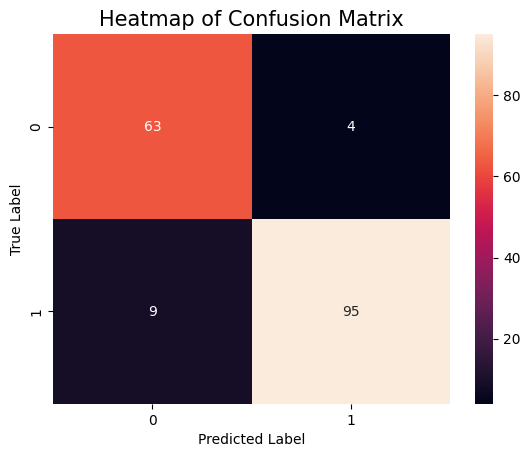

In [40]:
cm = confusion_matrix(y_test, X_test_prediction1_tuned)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [41]:
# Classification Report (After Tuning)
class_report_tuned = classification_report(y_test, X_test_prediction1_tuned)
print("Classification Report (After Tuning):")
print(class_report_tuned)

Classification Report (After Tuning):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        67
           1       0.96      0.91      0.94       104

    accuracy                           0.92       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



<a id="import"></a>
# <p style="background-color:#E9967A; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 5.3 | RandomForestClassifier </p>

In [42]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
X_test_prediction2 = model2.predict(X_test)
acc_3 = accuracy_score(X_test_prediction2, y_test)
print('Accuracy score on Test Data : ', acc_3)

Accuracy score on Test Data :  0.9532163742690059


In [44]:
conf_matrix = confusion_matrix(y_test, X_test_prediction2)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 63   4]
 [  4 100]]


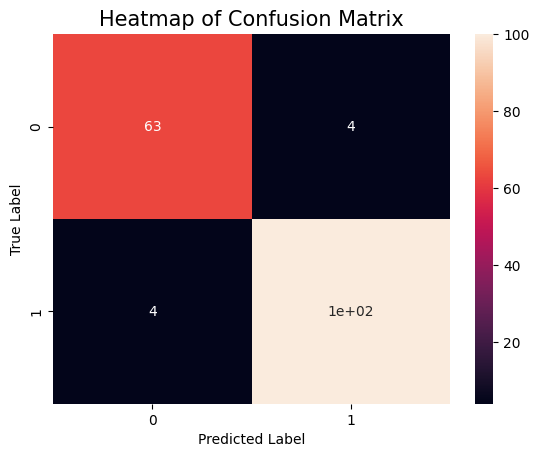

In [45]:
cm = confusion_matrix(y_test, X_test_prediction2)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [46]:
class_report = classification_report(y_test, X_test_prediction2)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.96      0.96      0.96       104

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



<a id="import"></a>
# <p style="background-color:#E9967A; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 5.4 | XGBClassifier </p>

In [47]:
model3 = XGBClassifier()
model3.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
X_test_prediction3 = model3.predict(X_test)
acc_4 = accuracy_score(X_test_prediction3, y_test)
print('Accuracy score on Test Data : ', acc_4)

Accuracy score on Test Data :  0.9590643274853801


In [49]:
conf_matrix = confusion_matrix(y_test, X_test_prediction3)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[65  2]
 [ 5 99]]


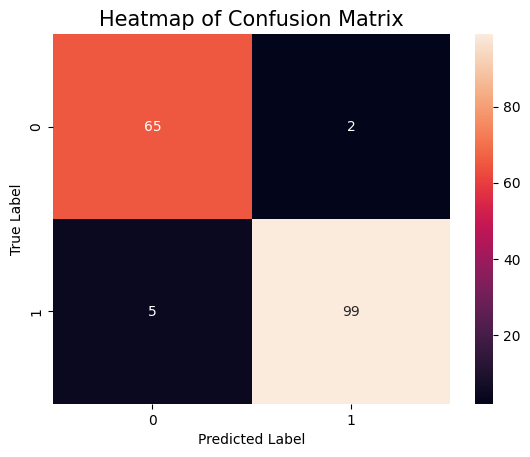

In [50]:
cm = confusion_matrix(y_test, X_test_prediction3)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [51]:
class_report = classification_report(y_test, X_test_prediction3)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        67
           1       0.98      0.95      0.97       104

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



<a id="import"></a>
# <p style="background-color:#E9967A; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 5.5 | GaussianNB </p>


In [52]:
model4 = GaussianNB()
model4.fit(X_train, y_train)

GaussianNB()

In [53]:
X_test_prediction4 = model4.predict(X_test)
acc_5 = accuracy_score(X_test_prediction4, y_test)
print('Accuracy score on Test Data : ', acc_5)

Accuracy score on Test Data :  0.9415204678362573


In [54]:
conf_matrix = confusion_matrix(y_test, X_test_prediction4)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[62  5]
 [ 5 99]]


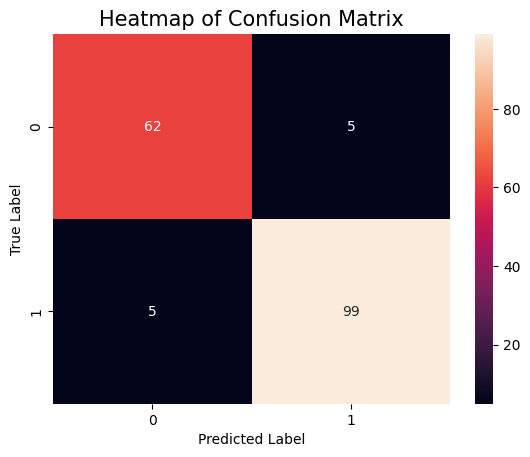

In [55]:
cm = confusion_matrix(y_test, X_test_prediction4)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [56]:
class_report = classification_report(y_test, X_test_prediction4)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        67
           1       0.95      0.95      0.95       104

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



<a id="import"></a>
# <p style="background-color:#E9967A; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 5.6 | GradientBoostingClassifier </p>

In [57]:
model5 = GradientBoostingClassifier()
model5.fit(X_train, y_train)

GradientBoostingClassifier()

In [58]:
X_test_prediction5 = model5.predict(X_test)
acc_6 = accuracy_score(X_test_prediction5, y_test)
print('Accuracy score on Test Data : ', acc_6)

Accuracy score on Test Data :  0.9473684210526315


In [59]:
conf_matrix = confusion_matrix(y_test, X_test_prediction5)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 62   5]
 [  4 100]]


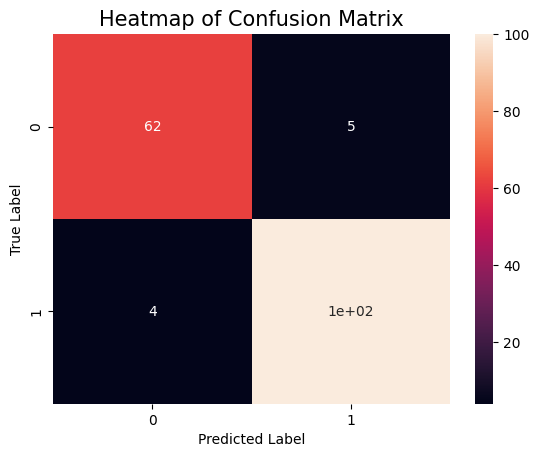

In [60]:
cm = confusion_matrix(y_test, X_test_prediction5)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [61]:
class_report = classification_report(y_test, X_test_prediction5)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.95      0.96      0.96       104

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



<a id="import"></a>
# <p style="background-color:#E9967A; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 5.7 | KNeighborsClassifier </p>

In [62]:
model6 = KNeighborsClassifier()
model6.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
X_test_prediction6 = model6.predict(X_test)
acc_7 = accuracy_score(X_test_prediction6, y_test)
print('Accuracy score on Test Data : ', acc_7)

Accuracy score on Test Data :  0.9181286549707602


In [64]:
conf_matrix = confusion_matrix(y_test, X_test_prediction6)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[59  8]
 [ 6 98]]


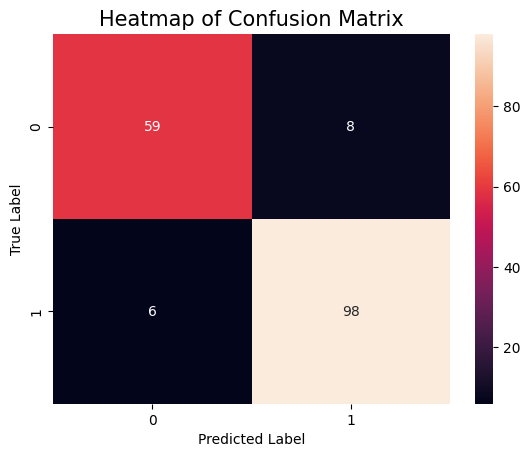

In [65]:
cm = confusion_matrix(y_test, X_test_prediction6)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [66]:
class_report = classification_report(y_test, X_test_prediction5)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.95      0.96      0.96       104

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



<a id="import"></a>
# <p style="background-color:#E9967A; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 5.8 | SVC </p>

In [67]:
model7 = SVC()
model7.fit(X_train, y_train)

SVC()

In [68]:
X_test_prediction7 = model7.predict(X_test)
acc_8 = accuracy_score(X_test_prediction7, y_test)
print('Accuracy score on Test Data (Before Tuning): ', acc_8)

Accuracy score on Test Data (Before Tuning):  0.9122807017543859


## Hyper tunning

In [69]:
# Step 3: Hyperparameter tuning using Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Best parameters from Grid Search
print("Best parameters from Grid Search: ", grid_search.best_params_)

Best parameters from Grid Search:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [70]:
best_model = grid_search.best_estimator_
X_test_prediction7_tuned = best_model.predict(X_test)

## After Hyper Tunning

In [71]:
# Step 5: Evaluate the tuned model
acc_8_tuned = accuracy_score(y_test, X_test_prediction7_tuned)
print('Accuracy score on Test Data (After Tuning): ', acc_8_tuned)

Accuracy score on Test Data (After Tuning):  0.9532163742690059


In [72]:
conf_matrix_tuned = confusion_matrix(y_test, X_test_prediction7_tuned)
print("Confusion Matrix (After Tuning):")
print(conf_matrix_tuned)

Confusion Matrix (After Tuning):
[[ 62   5]
 [  3 101]]


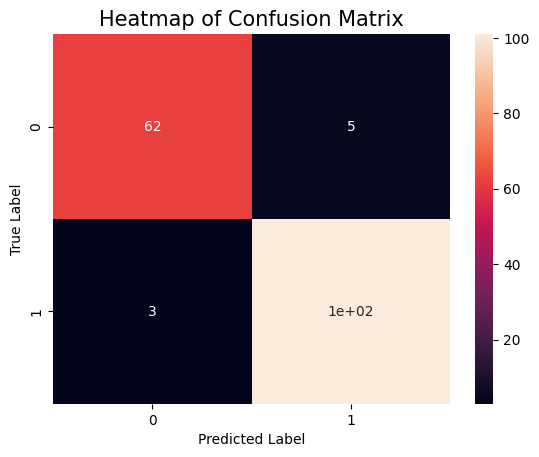

In [73]:
cm = confusion_matrix(y_test, X_test_prediction7_tuned)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [74]:
class_report_tuned = classification_report(y_test, X_test_prediction7_tuned)
print("Classification Report (After Tuning):")
print(class_report_tuned)

Classification Report (After Tuning):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.95      0.97      0.96       104

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



<a id="import"></a>
# <p style="background-color:#FF9999; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 6 | DataFrame </p>

In [75]:
result = pd.DataFrame({
    'Model': ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier','XGBClassifier','GaussianNB', 'GradientBoostingClassifier','KNeighborsClassifier', 'SVC'],
    'Accuracy' : [acc_1,acc_2_tuned, acc_3, acc_4, acc_5, acc_6,acc_7,acc_8_tuned]
})
result['Accuracy'] = result['Accuracy'].round(4)

result.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,XGBClassifier,0.9591
2,RandomForestClassifier,0.9532
7,SVC,0.9532
5,GradientBoostingClassifier,0.9474
4,GaussianNB,0.9415
1,DecisionTreeClassifier,0.9240
0,LogisticRegression,0.9181
6,KNeighborsClassifier,0.9181


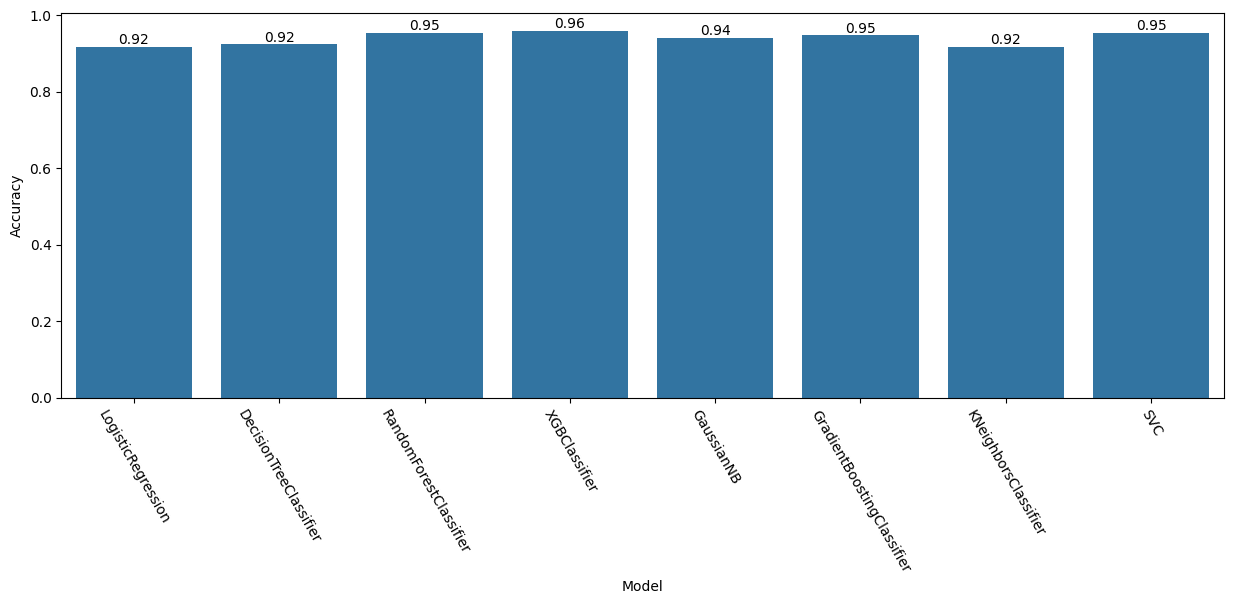

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Model', y='Accuracy', data=result)
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.set_xticklabels(labels=result.Model, rotation=300)
plt.show()

<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/jSJ5x4BM/bubbles-83683-640.jpg)">

<h3 style="font-size:185%; font-weight:bolder; color:Green">Results : </h3>

<span style="font-size:120%; font-weight:700; color:black">Acording to the above plots, best Model  base on Score is :</span>

<span style="font-size:100%; font-weight:500; color:black">
<ul><b>XGBClassifier </b></ul>
</br>
</span>

<span style="font-size:150%; font-weight:bolder; color:grey">So, We choose <mark> XGBClassifier </mark></span>
</div>

<h2 style="color: darkblue; font-family: 'Arial', sans-serif; text-align: left; padding: 10px;">
    LOC ROWS
</h2>

In [77]:
df.loc[140:140:].T

,140
diagnosis,1.000000
radius_mean,9.738000
texture_mean,11.970000
perimeter_mean,61.240000
area_mean,288.500000
smoothness_mean,0.092500
compactness_mean,0.041020
concavity_mean,0.000000
concave points_mean,0.000000
symmetry_mean,0.190300


<a id="import"></a>
# <p style="background-color:#FF9999; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 7 |  Making a Predictive System </p>

In [78]:
input_data = (9.738000,11.970000,61.240000,288.500000,0.092500,0.041020,0.000000,0.000000,0.190300,0.064220,0.198800,0.496000,1.218000,12.260000,0.006040,0.005656,
              0.000000,0.000000,0.022770,0.003220,10.620000,14.100000,66.530000,342.900000,0.123400,0.072040,0.000000,0.000000,0.310500,0.081510)
              
# changing the input_data to numpy array
array_input  = np.array(input_data)


# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = model3.predict(reshaped_input)
print(prediction)

if (prediction[0] == 0):
    print('The person has a High level of Cancer Symptoms')
else:
    print('The person has a  Very Low level of Cancer Symptoms')

[1]
The person has a  Very Low level of Cancer Symptoms


<a id="import"></a>
# <p style="background-color:#FF9999; font-family:calibri; color:#DC143C; font-size:170%; text-align:center; border-radius:45px 50px;">Step 8 |  Saving the trained model </p>

In [79]:
import pickle as pk

In [80]:
filename = 'Breast_deploy.sav'
pk.dump(model3, open(filename, 'wb'))

In [81]:
# loading the saved model
loaded_model = pk.load(open('Breast_deploy.sav', 'rb'))

In [82]:
input_data = (9.738000,11.970000,61.240000,288.500000,0.092500,0.041020,0.000000,0.000000,0.190300,0.064220,0.198800,0.496000,1.218000,12.260000,0.006040,0.005656,
              0.000000,0.000000,0.022770,0.003220,10.620000,14.100000,66.530000,342.900000,0.123400,0.072040,0.000000,0.000000,0.310500,0.081510)
              
# changing the input_data to numpy array
array_input  = np.array(input_data)


# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = loaded_model.predict(reshaped_input)
print(prediction)

if (prediction[0] == 0):
    print('The person has a High level of Cancer Symptoms')
else:
    print('The person has a Very Low level of Cancer Symptoms')

[1]
The person has a Very Low level of Cancer Symptoms


In [83]:
for column in X.columns:
  print(column)

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>

<div style="border-radius: 15px; border: 3px dashed #8a7d7f; padding: 20px; background-color: #f8f9fa; font-size: 100%; text-align: center; position: relative; box-shadow: 0 0 15px rgba(0, 0, 0, 0.2);">
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; background: url('https://www.transparenttextures.com/patterns/confetti.png') repeat; opacity: 0.1; border-radius: 15px;"></div>
    <h4 style="color: #333333; margin-bottom: 20px; position: relative; z-index: 1;">🙏 Thank you for taking the time to consider this matter 🙏</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <h4 style="color: #555555; position: relative; z-index: 1;"><b>Author:</b> Asif Shaikh</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <center style="position: relative; z-index: 1;">
        <strong style="color: #333333; font-size: 120%;">👍 If you enjoyed this Notebook, please give it an upvote. 👍</strong>
    </center>
    <br>
    <center style="position: relative; z-index: 1;">
        <strong style="color: #e91e63; font-size: 120%;">💫 Best Wishes 💫</strong>
    </center>
</div>
